# Final Project 1: Population and Agricultural Production Changes In Countries in Response to [Operation Condor]

## Team Malthus: Celeste Basken, Jocelyn  Velazquez, Reily Fairchild, Ziheng Zhang

# Table of Contents
1. [Introduction](#Introduction)
2. [Population Function, Deliverable 1A- Population Statistics](#Population-Function)
3. [Population DataFrame Function, Deliverable 3A - Population DataFrames](#Population-Dataframe)
4. [Regular Population Pyramids, Deliverable 4B - Population Pyramids](#Population-Pyramids)
5. [Animated Population Pyramids](#Results)
6. [Visaulizations](#Visualizations)
7. [Conclusion](#Conclusion)


Unit Tests, Deliverable 2[A] - Unit Tests


Introduction: The data exploration done in this notebook is aimed at exploring the impact and repurcussions done to countries in South America, primarily [Brazil, Argentina, ..] as a result of [].


## Initial Imports

In [1]:
%pip install wbdata
%pip install pandas
%pip install iso3166
%pip install cufflinks
%pip install eep153_tools
%pip install plotly

import numpy as np
import wbdata
import pandas as pd
import math
import iso3166
import plotly.offline as py
from scipy.optimize import newton
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
import cufflinks as cf
from matplotlib import animation as ani
cf.go_offline()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Key '2652534575623495032' not in persistent cache.
Key '5917366677622053338' not in persistent cache.
Key '-5320016625585844183' not in persistent cache.
Key '-9010307881539614009' not in persistent cache.
Key '5069685212135193930' not in persistent cache.
Key '-6167698091072703591' not in persistent cache.
Key '-4746141418518638052' not in persistent cache.
Key '-2648628576524819322' not in persistent cache.
Key '-1227071903970753783' not in persistent cache.
Key '5982288866530900312' not in persistent cache.
Key '5910457468197379100' not in persistent cache.
Key '4382865552063340646' not in persistent cache.
Key '-5710965498764747147' not in persistent cache.
Key '855905777976368090' not in persistent cache.
Key '-259452110028670257' not in persistent cache.
Key '357708086319399352' not in persistent cache.
Key '6439021458838856756' not in persistent cache.
Key '6498945012954013631' not in persistent cache.
Key '-1468128305251712453' not in persistent cache.
Key '-5249325491888010972

## Population Function

### This function returns a query response to the question: 'In [year] how many [people/males/females] aged [low] to [high] were living in [the world/region/country]?'

 Please note, this function was designed to be able to answer **only** the regions of countries targeted in Operation Condor, as that is the main focus region for our team.

In [2]:

import math
#def population(year,sex,age_low, age_high,place):
SOURCE = 40

def age_floor_lessthan_25(age_low, age_high, labels, sex):
    
    for i in np.arange(age_low, age_high+1):
            if sex == 'males':
                #labels[f'SP.POP.AG{str(i).zfill(2)}.MA.IN'] = f'SP.POP.AG{str(i).zfill(2)}.MA.IN'
                labels[f'SP.POP.AG{str(i).zfill(2)}.MA.IN'] = f'Males {str(i).zfill(2)}'
            elif sex == 'females':
                labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'Females {str(i).zfill(2)}'
                #labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'SP.POP.AG{str(i).zfill(2)}.FE.IN'
            else:
                #labels[f'SP.POP.AG{str(i).zfill(2)}.MA.IN'] = f'SP.POP.AG{str(i).zfill(2)}.MA.IN'
                #labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'SP.POP.AG{str(i).zfill(2)}.FE.IN'   
                labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'Females {str(i).zfill(2)}'
                labels[f'SP.POP.AG{str(i).zfill(2)}.MA.IN'] = f'Males {str(i).zfill(2)}'
                
def age_floor_greaterthan_25(age_low, age_high, labels, sex):
        age_floor = math.floor(age_low /5) * 5
        age_ceiling = math.ceil((age_high+1)/5)*5 
        floor_str = str(age_floor).zfill(2)
        num_ranges = (age_ceiling - age_floor) / 5
        for i in np.arange(num_ranges):
            lower_str = str(int(age_floor + 5 * i)).zfill(2)
            higher_str = str(int(age_floor + 5 * i + 4)).zfill(2)

           # lower_str = str(int(age_floor+5*i))
           # higher_str = str(int(age_floor+5*i+4))
           
             #override if age is >=80
            if lower_str >='80':
                lower_str = "80"
                higher_str = 'UP'
            if sex == 'males':
                labels[f'SP.POP.{lower_str}{higher_str}.MA'] = f'Males {lower_str}{higher_str}'
            elif sex == 'females':
                labels[f'SP.POP.{lower_str}{higher_str}.FE'] = f'Females {lower_str}{higher_str}'
            else:
                #labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'SP.POP.AG{str(i).zfill(2)}.FE'
                labels[f'SP.POP.{lower_str}{higher_str}.FE'] = f'Females {lower_str}{higher_str}'
                labels[f'SP.POP.{lower_str}{higher_str}.MA'] = f'Males {lower_str}{higher_str}'


#correct age range, use specific age year values if do not return null:
def age_range(age_low, age_high, sex): 
    labels = {}
    
    labels_test1 = {}
    age_floor_lessthan_25(0, 24, labels_test1, 'males')
    assert 'SP.POP.AG00.MA.IN' in labels_test1 and 'SP.POP.AG24.MA.IN' in labels_test1, "Failed to retrieve data for ages < 25"

    labels_test2 = {}
    age_floor_greaterthan_25(25, 39, labels_test2, 'females')
    assert 'SP.POP.2529.FE' in labels_test2 and 'SP.POP.3539.FE' in labels_test2, "Failed to retrieve data for ages >= 25"

    #age range [0,25]
    if age_high < 25:
        age_floor_lessthan_25(age_low, age_high, labels, sex)
    #age range [25, +]
    elif age_low >= 25:
        age_floor_greaterthan_25(age_low, age_high, labels, sex)
    #age range [0, 25+]
    else:
        age_floor_lessthan_25(age_low, 24, labels, sex)
        age_floor_greaterthan_25(25, age_high, labels, sex)
        
    return labels

#correct age range, use specific age year values (0,25) do return null:
def age_range_intv(age_low, age_high, sex):
    labels = {}
    
    labels_test2 = {}
    age_floor_greaterthan_25(25, 39, labels_test2, 'females')
    assert 'SP.POP.2529.FE' in labels_test2 and 'SP.POP.3539.FE' in labels_test2, "Failed to retrieve data for ages >= 25"

     
    age_floor_greaterthan_25(age_low, age_high, labels, sex)
   
    return labels



def get_region_df(labels, age_high, sex, place, year):
    df = wbdata.get_dataframe(labels,country = place,parse_dates=True)
    df = df.reset_index()
    df2 = df[df['date'] == f'{year}-01-01']

    #if the age high is >25 and <80 and not a multiple of 5, then take a proportional fraction of the last column
    #example: 27, in range [25, 29] want (27%5 /5)
    #doesn't account for ages 81, 82, 83, etc (difficult to interpolate when so little data on older ages)
    if ((age_high>=25) & (age_high<80) & (age_high%5 != 4)):
        
        population_count = df2.iloc[0, -1]
       
        proportion = (age_high%5+1) / 5
        df2.iloc[0, -1] = proportion*population_count
        
    return df2
#df = get_df(labels, sex, place, year)
#labels = range(22, 77, 'males')
#df = get_df(labels, 77, 'females', 'COL', 2022)
#df


def population(sex, age_low, age_high, place, year):
    # Error handling for invalid age range
    if age_low > age_high:
        raise ValueError(f"Invalid age range: ({age_low}) < ({age_high}). Please reverse the input age ranges.")

    # Validate `place` is a valid location in wbdata
    ls_countries = wbdata.get_countries()
    country_codes = [country['id'] for country in ls_countries]
    
    if place not in country_codes:
        raise ValueError(f"Invalid country code: {place}. Please enter a valid country. Call wbdata.get_countries to see the valid list of countries.")


    labels = age_range(age_low, age_high, sex)
     
    #unit test for age edge cases (if highest age lies in an interval)
    tlabels = {'SP.POP.2529.MA': 'Males 25-29'}
    df_test = get_region_df(tlabels, 27, sex, place, year)
    assert df_test.iloc[0, -1] <= df_test.iloc[0, 1], "Population proportion adjustment error!"


    df = get_region_df(labels, age_high, sex, place, year)
    
    # Check if the dataframe has any 'None' values for an age (Like 'WLD')
    if df.iloc[:, 1:].isnull().all().any():
        print('The age range (1, 25) returned null values, using interval ages ranges [0-5] instead')
        labels = age_range_intv(age_low, age_high, sex)
        df = get_region_df(labels, age_high, sex, place, year)
    
    df.drop('date', axis = 1, inplace=True)
    df['total pop in age range'] = df.sum(axis=1)
    total = df.iloc[0]['total pop in age range']
    display(f'In {year}, the number of {sex} between ages {age_low} to {age_high} living in {place} was approximately {total}')
    return df


In [3]:
#ENTER YOUR QUERIES HERE
#df_test = population('males', 0, 100, 'COL', 2000)
#assert df_test.iloc[0]['total pop in age range'] > 1e9 / 2, "Too few males in world population!"

population('males', 1, 24, 'WLD', 2000)
#df_test

The age range (1, 25) returned null values, using interval ages ranges [0-5] instead


'In 2000, the number of males between ages 1 to 24 living in WLD was approximately 1524729165.0'

,Males 0004,Males 0509,Males 1014,Males 1519,Males 2024,total pop in age range
23,323242397.0,319575048.0,322416810.0,295149165.0,264345745.0,1.524729e+09


## Population Dataframe
This function returns a pandas DataFrame indexed by Region or Country and Year, with columns giving counts of people in different age-sex groups. For the means of Team Malthus' project focus, this function was designed to produce specifics for **only** regions/countries we are focussing on: the countries directly targeted impacted by Operation Condor.


In [6]:
condor_countries = {'ARG': 'Argentina', 'BOL': 'Bolivia', 'BRA': 'Brazil', 'CHL': 'Chile', 'ECU': 'Ecuador', 'CLA':'Latin America and the Caribbean (IFC classification)', 'WLD' :"World"}
#labels = range(22, 77, 'females')
#df = get_df(labels, 77, 'females', 'COL', 2022)
#df


def get_region_df(age_low, age_high, sex, place, year):
    labels = age_range(age_low, age_high, sex)
    df = wbdata.get_dataframe(labels,country = place,parse_dates=True)
    df = df.reset_index()
    df2 = df[df['date'] == f'{year}-01-01']
    df2['date'] = year
    #if the age high is >25 and <80 and not a multiple of 5, then take a proportional fraction of the last column
    #example: 27, in range [25, 29] want (27%5 /5)
    if ((age_high>=25) & (age_high<80) & (age_high%5 != 4)):
        population_count = df2.iloc[0, -1]
       
        proportion = (age_high%5+1) / 5
        df2.iloc[0, -1] = proportion*population_count
        
        
    return df2

get_region_df(22, 77, 'females',condor_countries, 2021)

,country,date,Females 22,Females 23,Females 24,Females 2529,Females 3034,Females 3539,Females 4044,Females 4549,Females 5054,Females 5559,Females 6064,Females 6569,Females 7074,Females 7579
2,Argentina,2021,340990.0,339364.5,341034.0,1727965.0,1651617.0,1583375.0,1548702.0,1372580.0,1183031.0,1095091.0,1017473.0,914976.0,777595.0,361791.0
66,Bolivia,2021,109809.5,108289.5,107373.5,518258.0,469786.0,400557.0,349190.0,297321.0,251647.0,210244.0,169351.0,128503.0,96082.0,68510.0
130,Brazil,2021,1649095.0,1655825.0,1646923.0,8105921.0,8299446.0,8539224.0,8027939.0,7135873.0,6449326.0,6076687.0,5236762.0,4186711.0,3107121.0,2055915.0
194,Chile,2021,140459.5,145160.0,149702.0,792156.0,795033.0,725313.0,675065.0,649398.0,629116.0,586850.0,520887.0,436213.0,342926.0,236452.0
258,Ecuador,2021,155491.5,155337.5,155166.0,755239.0,701586.0,648686.0,574585.0,505627.0,442048.0,377253.0,313465.0,256287.0,198079.0,137218.0
322,World,2021,NaN,NaN,NaN,290638670.0,296697604.0,274546997.0,246000086.0,234930861.0,223923211.0,202156613.0,165292891.0,144946891.0,108698089.0,71377606.0


## Regular Population Pyramids

In [7]:
pd.options.plotting.backend = 'plotly'
SOURCE2=2 

## [4] Population Pyramids

In [8]:
# Look around a bit
wbdata.get_topics()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

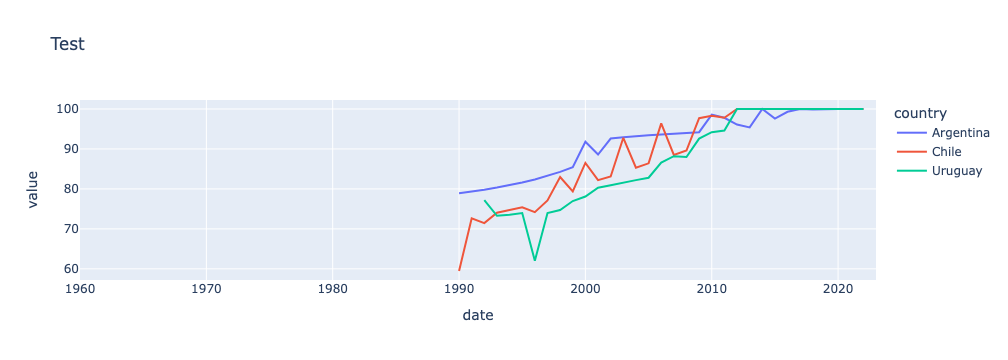

In [9]:
# this is extra code left over from playing around, for now
vars4 = {"EG.ELC.ACCS.RU.ZS":"Investigation"}

#BLA is all of Latin America and the Caribbean

scone=["BLA","CHL","ARG","URY"]
viet=["VNM","BRA"]

chldlabor = wbdata.get_dataframe(vars4,country=scone,parse_dates=True).squeeze().unstack('country')

chldlabor.plot(title="Test")

In [10]:
wbdata.get_indicators(source=40)

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

# World Population Pyramid

In [11]:
# Constructing a list of all possible age categories, such as 0-4, 5-9, ... 75-79, 80PLUS.
ages = []
for a in range(0,80,5):
    ages.append(f"{a:02d}"+f"{a+4:02d}")

ages.append("80UP")
# Print the result to ensure the correct ranges are created.
print(ages)

# Unit test for 'ages'
#ages_test = population('males', 0, 100, 'COL', 2000)


['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579', '80UP']


In [12]:
# Creates a dictionary, where each term defining a population in the wbdata dataset is named more descriptively.
male_ranges = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in ages}
female_ranges = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in ages}

# Develop a combined dictionary, then print it to sanity check.
categories = {**male_ranges, **female_ranges}
print(categories)

{'SP.POP.0004.MA': 'Males 0004', 'SP.POP.0509.MA': 'Males 0509', 'SP.POP.1014.MA': 'Males 1014', 'SP.POP.1519.MA': 'Males 1519', 'SP.POP.2024.MA': 'Males 2024', 'SP.POP.2529.MA': 'Males 2529', 'SP.POP.3034.MA': 'Males 3034', 'SP.POP.3539.MA': 'Males 3539', 'SP.POP.4044.MA': 'Males 4044', 'SP.POP.4549.MA': 'Males 4549', 'SP.POP.5054.MA': 'Males 5054', 'SP.POP.5559.MA': 'Males 5559', 'SP.POP.6064.MA': 'Males 6064', 'SP.POP.6569.MA': 'Males 6569', 'SP.POP.7074.MA': 'Males 7074', 'SP.POP.7579.MA': 'Males 7579', 'SP.POP.80UP.MA': 'Males 80UP', 'SP.POP.0004.FE': 'Females 0004', 'SP.POP.0509.FE': 'Females 0509', 'SP.POP.1014.FE': 'Females 1014', 'SP.POP.1519.FE': 'Females 1519', 'SP.POP.2024.FE': 'Females 2024', 'SP.POP.2529.FE': 'Females 2529', 'SP.POP.3034.FE': 'Females 3034', 'SP.POP.3539.FE': 'Females 3539', 'SP.POP.4044.FE': 'Females 4044', 'SP.POP.4549.FE': 'Females 4549', 'SP.POP.5054.FE': 'Females 5054', 'SP.POP.5559.FE': 'Females 5559', 'SP.POP.6064.FE': 'Females 6064', 'SP.POP.6569.

In [13]:
# Make a dataframe of the chosen 'country_choice' data

country_choice = "WLD"
world = wbdata.get_dataframe(categories,country=country_choice)

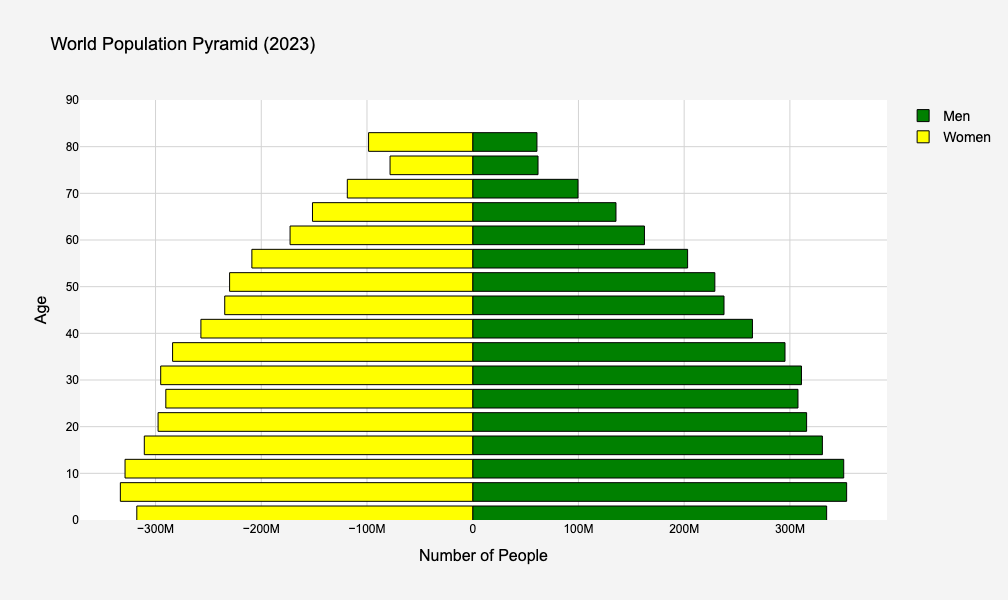

In [14]:
# Creating a population pyramid of the world
py.init_notebook_mode(connected=True)

layout_world1 = go.Layout(
    title="World Population Pyramid (2023)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=600,
    height=600,
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(
        title='Number of People',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    yaxis=dict(
        range=[0, 90],
        title='Age',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    showlegend=True
)

bins_world1 = [go.Bar(x = world.loc[str(2023),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in ages],
               orientation='h',
               name='Men',
               marker=dict(color='green', line=dict(color='black', width=1)),
               hoverinfo='skip'
               ),

        go.Bar(x = -world.loc[str(2023),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in ages],
               orientation='h',
               name='Women',
               marker=dict(color='yellow', line=dict(color='black', width=1)),
               hoverinfo='skip',
               )
        ]

py.iplot(dict(data=bins_world1, layout=layout_world1))

In [ ]:
# Trying to make an animated one..?

# Define available years
years = [1970, 1980, 1990, 2000, 2010, 2020]
ages = [f"{i}-{i+4}" for i in range(0, 85, 5)] + ["85+"]  # Includes 85+ group

# Function to create bar traces for a given year
def get_traces(year):
    male_values = world.loc[str(year)].filter(regex="Male").values
    female_values = world.loc[str(year)].filter(regex="Female").values

    return [
        go.Bar(
            x=male_values,
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Men',
            marker=dict(color='olive', line=dict(color='black', width=1)),
            hoverinfo='skip'
        ),
        go.Bar(
            x=-female_values,  # Keep negative values for left alignment
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Women',
            marker=dict(color='purple', line=dict(color='black', width=1)),
            hoverinfo='skip'
        )
    ]

# Ensure index is properly formatted for lookup
max_population = max(world.loc[world.index.astype(str).isin(map(str, years))].filter(regex="Male|Female").max().values)

# Create figure with initial data (1970)
fig2 = go.Figure(data=get_traces(1970), frames=[
    go.Frame(data=get_traces(year), name=str(year)) for year in years
])

# Update layout with proper axis alignment
fig2.update_layout(
    title="Animated World Population Pyramid (1970-2020)",
    width=700, height=600, paper_bgcolor='#f4f4f4', plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(title="Population", gridcolor='lightgray', range=[-max_population, max_population]),
    yaxis=dict(title="Age Group", gridcolor='lightgray'),
    barmode='overlay',
    showlegend=True,
    updatemenus=[{
        "buttons": [
            {"args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
             "label": "Play", "method": "animate"},
            {"args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
             "label": "Pause", "method": "animate"}
        ],
        "type": "buttons", "x": 0.1, "y": 0
    }],
    sliders=[{
        "steps": [{"args": [[str(year)], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                   "label": str(year), "method": "animate"} for year in years],
        "currentvalue": {"prefix": "Year: ", "font": {"size": 16}}
    }]
)

fig2.show()

# Population pyramids for target Operation Condor countries
    # Brazil, Chile, Argentina, Uruguay,  Ecuador, Colombia, Peru, and Paraguay

In [ ]:
# Regional Context
    # All of Latin America & the Caribbean (TLA)
country_choice_2 = "TLA"
LA_caribbean = wbdata.get_dataframe(categories,country=country_choice_2)

# Creating a population pyramid
py.init_notebook_mode(connected=True)

layout_LA_caribbean = go.Layout(
    title="Population Pyramid of Latin America and the Caribbean (2023)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=600,
    height=600,
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(
        title='Number of People',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    yaxis=dict(
        range=[0, 90],
        title='Age',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    showlegend=True
)

bins_LA_caribbean = [go.Bar(x = LA_caribbean.loc[str(2023),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in ages],
               orientation='h',
               name='Men',
               marker=dict(color='green', line=dict(color='black', width=1)),
               hoverinfo='skip'
               ),

        go.Bar(x = -LA_caribbean.loc[str(2023),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in ages],
               orientation='h',
               name='Women',
               marker=dict(color='yellow', line=dict(color='black', width=1)),
               hoverinfo='skip',
               )
        ]

py.iplot(dict(data=bins_LA_caribbean, layout=layout_LA_caribbean))

In [ ]:
# A figure comparing the population pyramids of various Operation Condor countries in 1980

# Define multiple countries
country_choices = ["CHL", "BRA", "ARG", "PER"]
country_titles = ["Chile", "Brazil", "Argentina", "Peru"]

# Create a subplot layout (2 rows, 2 columns)
fig_5 = make_subplots(rows=2, cols=2, subplot_titles=country_titles)

# Loop through each country and generate its population pyramid
for i, (country, title) in enumerate(zip(country_choices, country_titles)):
    condor_countries = wbdata.get_dataframe(categories, country=country)

    # Extract male and female data
    male_data = condor_countries.loc[str(1980), :].filter(regex="Male").values
    female_data = -condor_countries.loc[str(1980), :].filter(regex="Female").values  # Negative for left alignment
    age_groups = [int(s[:2]) + 1 for s in ages]  # Convert age labels to integers

    # Determine subplot position
    row = i // 2 + 1
    col = i % 2 + 1

    # Add Male bar trace
    fig_5.add_trace(go.Bar(
        x=male_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Men',
        marker=dict(color='blue', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

    # Add Female bar trace
    fig_5.add_trace(go.Bar(
        x=female_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Women',
        marker=dict(color='pink', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

 # Customize X and Y axis labels for each subplot
    fig_5.update_xaxes(title_text="Number of People", row=row, col=col)
    fig_5.update_yaxes(title_text="Age", row=row, col=col)

# Updated layout for aesthetics!
fig_5.update_layout(
    title="Population Pyramids of Selected Latin American Countries during Operation Condor (1980)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=1200,  # Adjust width
    height=1000,  # Adjust height
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    showlegend=True
)

# Make the final figure
fig_5.show()

In [ ]:
# A figure comparing the population pyramids of various Operation Condor countries in 2023 (recent data)
    # Note: compare with the figure above to see the changes from 1980-2023

# Define multiple countries
country_choices = ["CHL", "BRA", "ARG", "PER"]
country_titles = ["Chile", "Brazil", "Argentina", "Peru"]

# Create a subplot layout (2 rows, 2 columns)
fig_4 = make_subplots(rows=2, cols=2, subplot_titles=country_titles)

# Loop through each country and generate its population pyramid
for i, (country, title) in enumerate(zip(country_choices, country_titles)):
    condor_countries = wbdata.get_dataframe(categories, country=country)

    # Extract male and female data
    male_data = condor_countries.loc[str(2023), :].filter(regex="Male").values
    female_data = -condor_countries.loc[str(2023), :].filter(regex="Female").values  # Negative for left alignment
    age_groups = [int(s[:2]) + 1 for s in ages]  # Convert age labels to integers

    # Determine subplot position
    row = i // 2 + 1
    col = i % 2 + 1

    # Add Male bar trace
    fig_4.add_trace(go.Bar(
        x=male_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Men',
        marker=dict(color='green', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

    # Add Female bar trace
    fig_4.add_trace(go.Bar(
        x=female_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Women',
        marker=dict(color='yellow', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

 # Customize X and Y axis labels for each subplot
    fig_4.update_xaxes(title_text="Number of People", row=row, col=col)
    fig_4.update_yaxes(title_text="Age", row=row, col=col)

# Updated layout for aesthetics!
fig_4.update_layout(
    title="Population Pyramids of Selected Latin American Countries (2023)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=1200,  # Adjust width
    height=1000,  # Adjust height
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    showlegend=True
)

# Make the final figure
fig_4.show()

## [5] Animated Population Pyramids

In [ ]:
# Animated Population Pyramid of the World

# Define available years
years = [1970, 1980, 1990, 2000, 2010, 2020]
ages = [f"{i}-{i+4}" for i in range(0, 85, 5)] + ["85+"]  # Includes 85+ group

# Create bar graphs for a given year
def get_traces(year):
    male_values = world.loc[str(year)].filter(regex="Male").values
    female_values = world.loc[str(year)].filter(regex="Female").values

    return [
        go.Bar(
            x=male_values,
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Men',
            marker=dict(color='green', line=dict(color='black', width=1)),
            hoverinfo='skip'
        ),
        go.Bar(
            x=-female_values,  # Keep negative values for left alignment
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Women',
            marker=dict(color='yellow', line=dict(color='black', width=1)),
            hoverinfo='skip'
        )
    ]

# Set index
max_population = max(world.loc[world.index.astype(str).isin(map(str, years))].filter(regex="Male|Female").max().values)

# Create figure with initial data (1970)
fig2 = go.Figure(data=get_traces(1970), frames=[
    go.Frame(data=get_traces(year), name=str(year)) for year in years
])

# Update layout with proper axis alignment
fig2.update_layout(
    title="Animated World Population Pyramid (1970-2020)",
    width=700, height=600, paper_bgcolor='#f4f4f4', plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(title="Population", gridcolor='lightgray', range=[-max_population, max_population]),
    yaxis=dict(title="Age Group", gridcolor='lightgray'),
    barmode='overlay',
    showlegend=True,
    updatemenus=[{
        "buttons": [
            {"args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
             "label": "Play", "method": "animate"},
            {"args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
             "label": "Pause", "method": "animate"}
        ],
        "type": "buttons", "x": 0.1, "y": 0
    }],
    sliders=[{
        "steps": [{"args": [[str(year)], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                   "label": str(year), "method": "animate"} for year in years],
        "currentvalue": {"prefix": "Year: ", "font": {"size": 16}}
    }]
)

fig2.show()

## Population Maps

In [ ]:
!pip install geopandas contextily matplotlib pandas
!pip install --upgrade contextily xyzservices

import matplotlib.pyplot as plt
import contextily as ctx  
import geopandas as gpd
file_path = "south-america_652.geojson"
southamerica= gpd.read_file(file_path)
southamerica


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
southamerica.plot(ax=ax, edgecolor="black", color="pink")

plt.title("South America Map")
plt.show()

In [ ]:
southamerica.head()

In [ ]:
selected_countries = ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]
filtered_df = southamerica[southamerica["name"].isin(selected_countries)]
print(southamerica.columns)


In [ ]:
population_data = {
    "Country": ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"],
    "Population": [213000000, 19000000, 45000000, 3500000, 17800000, 50800000, 33000000, 7100000]
}
population_df = pd.DataFrame(population_data)

In [ ]:
merged_df = filtered_df.merge(population_df, left_on="name", right_on="Country")

In [ ]:
import contextily as ctx
print(ctx.providers.keys())

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(column="Population", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("Population Distribution in South America", fontsize=15)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()





In [ ]:
argentina = southamerica[southamerica['name'] == 'Argentina']
argentina.plot()

## Other visualization tools

In [ ]:

from datetime import datetime


target_countries = {
    "BRA": "Brazil", "ARG": "Argentina", "CHL": "Chile", "URY": "Uruguay",
    "ECU": "Ecuador", "COL": "Colombia", "PER": "Peru", "PRY": "Paraguay"
}
start_year, end_year = 1986, 1990


agriculture_gdp = wbdata.get_dataframe(
    {"NV.AGR.TOTL.ZS": "Agriculture_GDP"}, 
    country=list(target_countries.keys()), 
    date=(datetime(start_year, 1, 1), datetime(end_year, 12, 31))  
)


agriculture_gdp.reset_index(inplace=True)
agriculture_gdp.rename(columns={"date": "Year", "country": "Country"}, inplace=True)
agriculture_gdp["Year"] = agriculture_gdp["Year"].astype(int)


print(agriculture_gdp.head())


In [ ]:

csv_file_path = "/home/jovyan/Project1/FAOSTAT_data_en_2-4-2025.csv"

try:
    df = pd.read_csv(csv_file_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    df = pd.read_csv(csv_file_path, encoding="ISO-8859-1")

print(df.head())
target_countries = ["Brazil", "Argentina", "Chile", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]

df_filtered = df[
    (df["Reporter Countries"].isin(target_countries)) &
    (df["Year"].between(1986, 1990)) &  
    (df["Element"].isin(["Export value", "Import value"]))  
]

df_pivot = df_filtered.pivot_table(
    index=["Reporter Countries", "Year"],
    columns="Element",
    values="Value",
    aggfunc="sum"
).reset_index()

df_pivot["Net_Export"] = df_pivot.get("Export value", 0) - df_pivot.get("Import value", 0)

df_pivot.rename(columns={"Reporter Countries": "Country"}, inplace=True)

print(df_pivot.head())  

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Export value", hue="Country", data=df_pivot, marker="o", linewidth=2.5)
sns.lineplot(x="Year", y="Import value", hue="Country", data=df_pivot, marker="s", linestyle="dashed", linewidth=2.5)

plt.title("Agricultural Export & Import Trends (1986-1990)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Value (1000 USD)")
plt.legend(title="Country")  
plt.xticks(df_pivot["Year"].unique())
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Net_Export", hue="Country", data=df_pivot, marker="o", linewidth=2.5)

plt.title("Net Agricultural Export Trends (1986-1990)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Net Export Value (1000 USD)")
plt.xticks(df_pivot["Year"].unique())
plt.axhline(0, color="black", linestyle="--", linewidth=1) 
plt.show()


In [ ]:
target_countries = {
    "BRA": "Brazil", "ARG": "Argentina", "CHL": "Chile", "URY": "Uruguay",
    "ECU": "Ecuador", "COL": "Colombia", "PER": "Peru", "PRY": "Paraguay"
}
start_year, end_year = 1986, 1990

agriculture_gdp = wbdata.get_dataframe(
    {"NV.AGR.TOTL.ZS": "Agriculture_GDP"}, 
    country=list(target_countries.keys()), 
    date=(datetime(start_year, 1, 1), datetime(end_year, 12, 31))
)

agriculture_gdp.reset_index(inplace=True)
agriculture_gdp.rename(columns={"date": "Year", "country": "Country"}, inplace=True)
agriculture_gdp["Year"] = agriculture_gdp["Year"].astype(int)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Agriculture_GDP", hue="Country", data=agriculture_gdp, marker="o", linewidth=2.5)
plt.title("Agricultural GDP Trends (1986-1990)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Agriculture GDP (%)")
plt.xticks(agriculture_gdp["Year"].unique())  
plt.legend(title="Country")
plt.show()

gdp_stats = agriculture_gdp.groupby("Country")["Agriculture_GDP"].agg(["mean", "std"]).reset_index()
gdp_stats.rename(columns={"mean": "Mean_GDP", "std": "Std_Dev_GDP"}, inplace=True)
print("📊 Agricultural GDP Statistics:\n", gdp_stats)

agriculture_gdp["GDP_Growth"] = agriculture_gdp.groupby("Country")["Agriculture_GDP"].pct_change() * 100
print("📈 Agricultural GDP Growth Rate Data:\n", agriculture_gdp.head())
